In [2]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data Augumentation"
import os
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [ ]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/inception-v3-weights/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
/kaggle/input/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)/Non Drowsy/e0604.png
/kaggle/input/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)/Non Drowsy/y0868.png
/kaggle/input/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)/Non Drowsy/a1012.png
/kaggle/input/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)/Non Drowsy/c0445.png
/kaggle/input/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)/Non Drowsy/u0030.png
/kaggle/input/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)/Non Drowsy/r0229.png
/kaggle/input/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)/Non Drowsy/n0503.png
/kaggle/input/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)/Non Drowsy/za0739.png
/kaggle/input/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)/Non Drowsy/m0348.png
/kaggle/input/driver-drowsiness-da

In [3]:
# Chemin vers le dataset Kaggle
base_dir = "/kaggle/input/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)"

In [4]:
os.listdir("/kaggle/input/inception-v3-weights")

['inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5']

In [5]:
weights_path = "/kaggle/input/inception-v3-weights/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

In [7]:
# Prétraitement + augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # au lieu de rescale=1./255
    rotation_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2
)

batchsize = 32

In [8]:
# Jeu d'entraînement
train_data = train_datagen.flow_from_directory(
    base_dir,
    target_size=(299, 299),      
    batch_size=batchsize,
    class_mode='binary', 
    subset='training'
)

# Jeu de validation
validation_data = train_datagen.flow_from_directory(
    base_dir,
    target_size=(299, 299),
    batch_size=batchsize,
    class_mode='binary',
    subset='validation'
)


Found 33435 images belonging to 2 classes.
Found 8358 images belonging to 2 classes.


In [10]:
# Base InceptionV3
bmodel = InceptionV3(include_top=False, weights=weights_path, input_tensor=Input(shape=(299,299,3)))

# Ajout de nouvelles couches
hmodel = GlobalAveragePooling2D()(bmodel.output)
hmodel = Dense(128, activation='relu')(hmodel)
hmodel = Dropout(0.5)(hmodel)
hmodel = Dense(64, activation='relu')(hmodel)
hmodel = Dropout(0.5)(hmodel)
hmodel = Dense(1, activation='sigmoid')(hmodel)  # binaire

# Création du modèle final
model = Model(inputs=bmodel.input, outputs=hmodel)

# Geler les couches de la base
for layer in bmodel.layers:
    layer.trainable = False

# Résumé du modèle
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_94 (Conv2D)  │ (None, 149, 149,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_94[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_95 (Conv2D)  │ (None, 147, 147,  │      9,216 │ activation_94[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_95[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, 147, 147,  │     18,432 │ activation_95[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_96[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 73, 73,    │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, 73, 73,    │      5,120 │ max_pooling2d_4[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_97[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_98 (Conv2D)  │ (None, 71, 71,    │    138,240 │ activation_97[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_98[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 22,073,377 (84.20 MB)

 Trainable params: 270,593 (1.03 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

**Liste des callbacks**

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau

# Sauvegarde automatiquement le meilleur modèle pendant l’entraînement
checkpoint = ModelCheckpoint('/kaggle/working/ModelDrowsiness.h5',
                               monitor='val_loss',save_best_only=True,verbose=3)

# Arrête l’entraînement si la perte de validation (val_loss) ne s’améliore pas pendant 7 epochs
earlystop = EarlyStopping(monitor = 'val_loss', patience=7, verbose= 3, restore_best_weights=True)

# Réduit automatiquement le taux d’apprentissage si le modèle ne s’améliore pas pendant 3 epochs.
learning_rate = ReduceLROnPlateau(monitor= 'val_loss', patience=3, verbose= 3, )

callbacks=[earlystop,learning_rate, checkpoint]

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // batchsize,
    validation_data=validation_data,
    validation_steps=validation_data.samples // batchsize,
    callbacks=callbacks,
    epochs=30
)

Epoch 1/30
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 0s 915ms/step - accuracy: 0.6643 - loss: 0.5969
Epoch 1: val_loss improved from inf to 0.66534, saving model to /kaggle/working/ModelDrowsiness.h5
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 1216s 1s/step - accuracy: 0.6644 - loss: 0.5968 - val_accuracy: 0.7164 - val_loss: 0.6653 - learning_rate: 1.0000e-04
Epoch 2/30
   1/1044 ━━━━━━━━━━━━━━━━━━━━ 2:24 138ms/step - accuracy: 0.8125 - loss: 0.3382

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_loss improved from 0.66534 to 0.66266, saving model to /kaggle/working/ModelDrowsiness.h5
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 178s 170ms/step - accuracy: 0.8125 - loss: 0.3382 - val_accuracy: 0.7170 - val_loss: 0.6627 - learning_rate: 1.0000e-04
Epoch 3/30
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 0s 696ms/step - accuracy: 0.9071 - loss: 0.2544
Epoch 3: val_loss did not improve from 0.66266
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 910s 872ms/step - accuracy: 0.9071 - loss: 0.2544 - val_accuracy: 0.6941 - val_loss: 0.8566 - learning_rate: 1.0000e-04
Epoch 4/30
   1/1044 ━━━━━━━━━━━━━━━━━━━━ 1:58 114ms/step - accuracy: 0.8125 - loss: 0.2973
Epoch 4: val_loss did not improve from 0.66266
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 178s 171ms/step - accuracy: 0.8125 - loss: 0.2973 - val_accuracy: 0.6976 - val_loss: 0.8419 - learning_rate: 1.0000e-04
Epoch 5/30
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 0s 695ms/step - accuracy: 0.9543 - loss: 0.1366
Epoch 5: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.



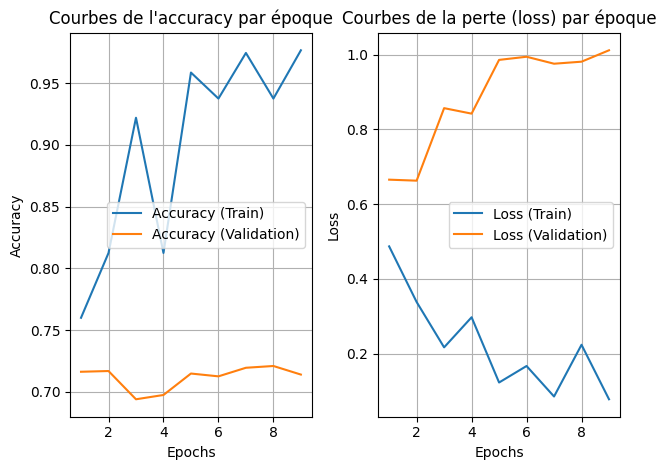

In [21]:
import matplotlib.pyplot as plt  
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.subplot(1, 2, 1) 
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Accuracy (Train)')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Accuracy (Validation)')
plt.title('Courbes de l\'accuracy par époque')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2) 
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Loss (Train)')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Loss (Validation)')
plt.title('Courbes de la perte (loss) par époque')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Afficher les graphiques
plt.tight_layout()
plt.show()

In [22]:
# Évaluation sur l'ensemble d'entraînement
train_loss, train_accuracy = model.evaluate(train_data)
print(f"Training loss: {train_loss}, Training accuracy: {train_accuracy}")

# Évaluation sur l'ensemble de validation
val_loss, val_accuracy = model.evaluate(validation_data)
print(f"Validation loss: {val_loss}, Validation accuracy: {val_accuracy}")

1045/1045 ━━━━━━━━━━━━━━━━━━━━ 725s 694ms/step - accuracy: 0.9336 - loss: 0.2234
Training loss: 0.22197872400283813, Training accuracy: 0.9346493482589722
262/262 ━━━━━━━━━━━━━━━━━━━━ 186s 709ms/step - accuracy: 0.7160 - loss: 0.6628
Validation loss: 0.663422167301178, Validation accuracy: 0.7145249843597412


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_317']
Received: inputs=Tensor(shape=(32, 299, 299, 3))
  warnings.warn(msg)


261/262 ━━━━━━━━━━━━━━━━━━━━ 0s 737ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_317']
Received: inputs=Tensor(shape=(None, 299, 299, 3))
  warnings.warn(msg)


262/262 ━━━━━━━━━━━━━━━━━━━━ 206s 760ms/step


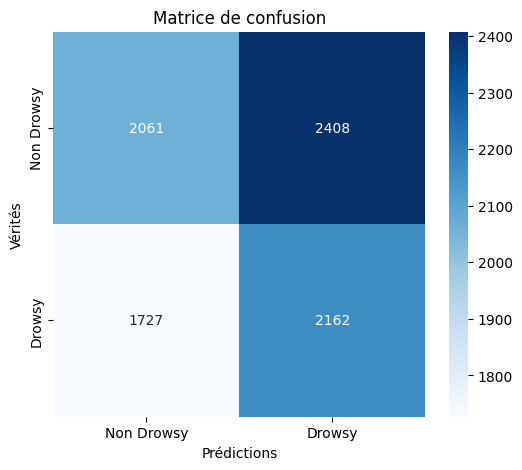


Rapport de classification :
              precision    recall  f1-score   support

  Non Drowsy       0.54      0.46      0.50      4469
      Drowsy       0.47      0.56      0.51      3889

    accuracy                           0.51      8358
   macro avg       0.51      0.51      0.51      8358
weighted avg       0.51      0.51      0.50      8358



In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 Étape 1 : obtenir les vraies étiquettes
Y_true = validation_data.classes   # Les vraies classes du dataset de validation

# 🔹 Étape 2 : prédictions du modèle
Y_pred = model.predict(validation_data)
Y_pred = (Y_pred > 0.5).astype(int).ravel()   # Convertir en 0 ou 1 (binaire)

# 🔹 Étape 3 : matrice de confusion
cm = confusion_matrix(Y_true, Y_pred)

# 🔹 Étape 4 : affichage graphique
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non Drowsy', 'Drowsy'],
            yticklabels=['Non Drowsy', 'Drowsy'])
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vérités')
plt.show()

# 🔹 Étape 5 : rapport de classification
print("\nRapport de classification :")
print(classification_report(Y_true, Y_pred, target_names=['Non Drowsy', 'Drowsy']))
